In [1]:
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt

# Method 

In [2]:
# Function to convert the fasta sequence to an array 

def fasta_to_array(fasta):
    array = []
    for i in range(0, len(fasta)): # for each elemnt in the sequence, save it as an element of an array 
        array.append(fasta[i])
        
    return ''.join(array) # join all elements of the array to get the complete sequence without the ','

In [3]:
# Function to separete the complete sequence to k-mer of 14 

def k_mer(seq):
    array = []
    t = 0
    for i in range(0, len(seq)-13): 
        array.append(seq[t:t+14]) 
        t += 1
        
    return array # return an array with all the k-mers 

In [4]:
# Function for Jaccard distances

def distance(kmer_1, kmer_2):
    union = set(kmer_1)|set(kmer_2) 
    # get an array of the union of elemnents of the two input arrays without duplicates 
    intersection = set(kmer_1)&set(kmer_2) 
    # get an array of the elements intersected between the two input arrays 
    
    return len(intersection)/len(union) # get the jaccard distance 

In [5]:
# Function to get the lowest hash values from k-mers

def hash_sketch(kmers, size):
    array = []
    for i in range(0,len(kmers)): 
        # for each k-mer in the input array, save the hash value of the k-mer as an element of a new array
        array.append(hash(kmers[i])) 
        
    array = np.sort(array) # sort the hash values of the new array 
    return array[0:size] # return only the first n values of the sorted array 

In [6]:
# Function to do everything in one step 

def jac_dis(fasta1, fasta2, size):
    # get the k-mers from the sequence
    k1 = k_mer(fasta_to_array(fasta1)) 
    k2 = k_mer(fasta_to_array(fasta2))
    
    # return the jaccard distance of the arrays with the lowest hash values
    return distance(hash_sketch(k1, size), hash_sketch(k2, size))

# Distance of the two 'reference' sequences 

In [7]:
ref_1 = SeqIO.read("R6.fa", "fasta") # read the fasta files 
ref_2 = SeqIO.read("TIGR4.fa", "fasta")


dis_ref = jac_dis(ref_1, ref_2, 1000) 
full_dis_ref = distance(k_mer(fasta_to_array(ref_1)), k_mer(fasta_to_array(ref_2)))

print('Jaccard distance with k-mers:' + str(full_dis_ref) 
      +', distance with MinHash:' + str(dis_ref))

Jaccard distance with k-mers:0.02563124048040474, distance with MinHash:0.02936378466557912


# Distance of the two 'draft' sequences 

In [8]:
draft_1 = [] # read and asemble the diferent contigs into one continuous sequence
for sequence in SeqIO.parse("14412_3#82.contigs_velvet.fa", "fasta"):
    draft_1.append(fasta_to_array((sequence.seq)))
draft_1 = ''.join(draft_1)

draft_2 = [] 
for sequence in SeqIO.parse("14412_3#84.contigs_velvet.fa", "fasta"):
    draft_2.append(fasta_to_array((sequence.seq)))
draft_2 = ''.join(draft_2)


dis_drafts = jac_dis(draft_1, draft_2, 1000) 
full_dis_drafts = distance(k_mer(fasta_to_array(draft_1)), k_mer(fasta_to_array(draft_2)))

print('Jaccard distance with k-mers:' + str(full_dis_drafts) 
      +', distance with MinHash:' + str(dis_drafts))

Jaccard distance with k-mers:0.4391746577993225, distance with MinHash:0.4527177959791511


In [9]:
x, y, w  = [], [], []
for i in range(500, 10000, 500): 
    x.append(i)
    y.append(jac_dis(ref_1, ref_2, i))
    w.append(jac_dis(draft_1, draft_2, i))
    
z = [full_dis_ref for i in range(0,len(y))]
u = [full_dis_drafts for i in range(0,len(w))]

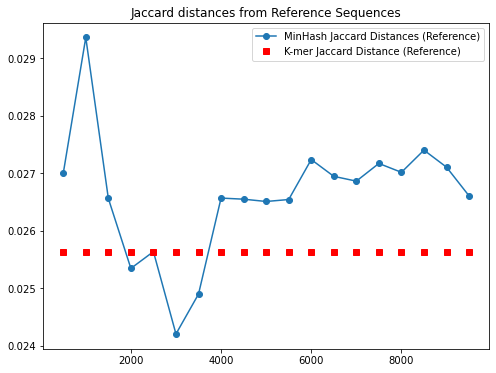

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, 'o-', label = 'MinHash Jaccard Distances (Reference)')
ax.plot(x, z, 'rs', label = 'K-mer Jaccard Distance (Reference)')
ax.set_title('Jaccard distances from Reference Sequences')
plt.legend(loc="upper right")
plt.show()

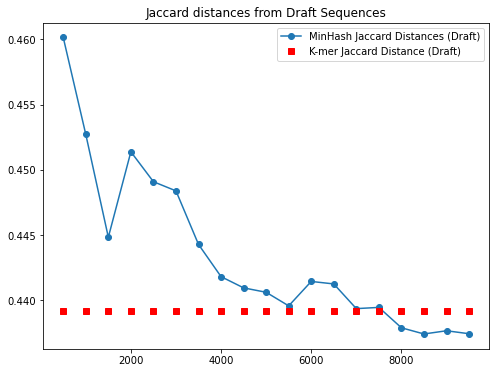

In [11]:
fig2, ax2 = plt.subplots(figsize=(8, 6))

ax2.plot(x, w, 'o-', label='MinHash Jaccard Distances (Draft)')
ax2.plot(x, u, 'rs', label='K-mer Jaccard Distance (Draft)')
ax2.set_title('Jaccard distances from Draft Sequences')
plt.legend(loc="upper right")
plt.show()

### If the sketch size increases, the error between the full distance and the Min-Hash distance decreases, as we can observe the Min-Hash distance value oscilates arround the full distance value